### Census Income Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("census.csv")
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


**Here's a brief version of what you'll find in the data file.**

- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad,Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate,5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated,Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales,Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran,Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,Holand-Netherlands)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


#### Checking for missing data


In [4]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**No missing data**

#### EDA

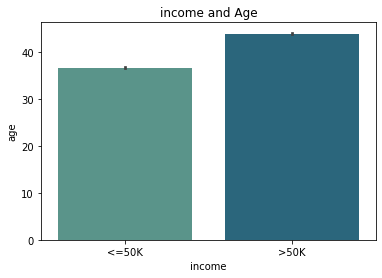

In [5]:

sns.barplot(x = "income", y = "age", data = df, palette="crest")
plt.title("income and Age")
plt.show()

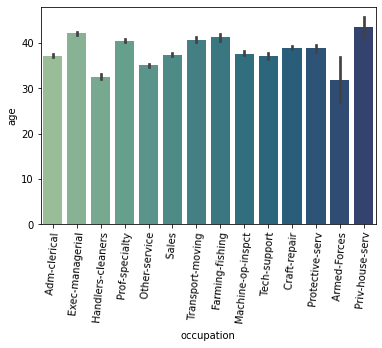

In [6]:
sns.barplot(x = "occupation",y = "age",data = df, palette="crest")
plt.xticks(rotation = 85)
plt.show()

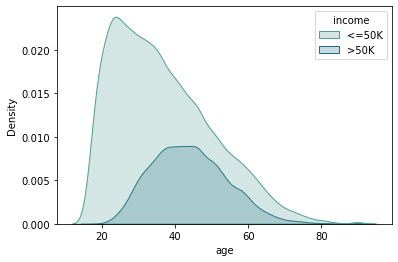

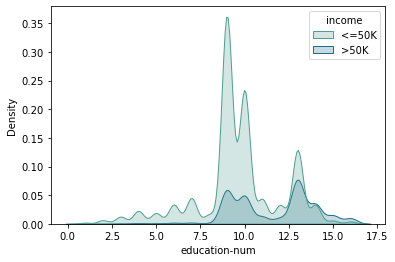

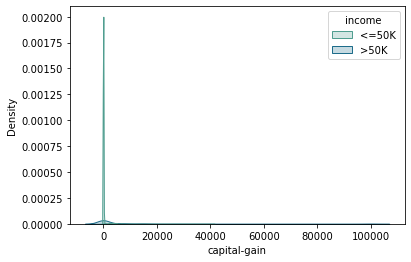

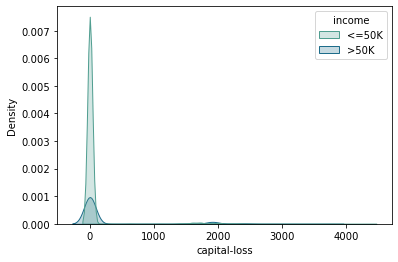

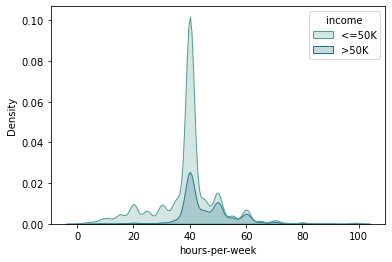

In [7]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.kdeplot(df[i],shade=True,hue="income", data = df,palette="crest")
    plt.show()

#### Skewness

In [8]:
df.skew()

age                0.532816
education-num     -0.310621
capital-gain      11.789002
capital-loss       4.516304
hours-per-week     0.340545
dtype: float64

- `capital-gain`and `capital-loss` has high Skewed 

In [9]:
df["capital-loss"] = df["capital-loss"].apply(lambda x: np.log(x) if x != 0 else 0) 
df["capital-gain"] = df["capital-gain"].apply(lambda x: np.log(x) if x != 0 else 0) 

In [10]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [11]:
df["income"] = df["income"].apply(lambda x: 0 if x == "<=50K" else 1)

#### Correlation between attributes and heatmap

In [12]:
corr = df.corr()
corr["income"].sort_values(ascending=False)

income            1.000000
education-num     0.332800
capital-gain      0.287745
age               0.237040
hours-per-week    0.227199
capital-loss      0.139255
Name: income, dtype: float64

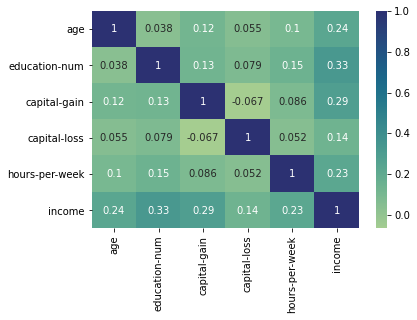

In [13]:
sns.heatmap(corr,annot=True,cmap = "crest")
plt.show()

#### Feature Engineering and Feature Selection

In [14]:
country_count = df.groupby('native-country').size().sort_values(ascending=False)
country_count

native-country
 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                  

In [15]:
df["native-country"] = df["native-country"].apply(lambda x: ' other' if x in country_count[country_count<=30] else x)
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,0


In [16]:
dummies = pd.get_dummies(df["native-country"],drop_first=True)
df = pd.concat([df,dummies],axis='columns')
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,Peru,Philippines,Poland,Portugal,Puerto-Rico,South,Taiwan,United-States,Vietnam,other
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [17]:
country_list = list(zip(dummies.columns,range(df.shape[1])))
with open('country_cat', 'wb') as fid:
    pickle.dump(country_list, fid,2)

<IPython.core.display.Javascript object>

In [18]:
dummies = pd.get_dummies(df["marital-status"])
df = pd.concat([df,dummies],axis='columns')
meriatal_list = list(zip(dummies.columns,range(df.shape[1])))
with open('merital', 'wb') as fid:
    pickle.dump(meriatal_list, fid,2)

<IPython.core.display.Javascript object>

In [19]:
education = pd.get_dummies(df["education_level"])
df = pd.concat([df,education],axis='columns')
education_list = list(zip(education.columns,range(df.shape[1])))
with open('education', 'wb') as fid:
    pickle.dump(education_list, fid,2)

<IPython.core.display.Javascript object>

In [20]:
work = pd.get_dummies(df["workclass"])
occupation = pd.get_dummies(df["occupation"])
relation = pd.get_dummies(df["relationship"])
sex = pd.get_dummies(df["sex"])
race = pd.get_dummies(df["race"])

df = pd.concat([df,education,race,work,occupation,relation,sex],axis='columns')

race_list = list(zip(race.columns,range(df.shape[1])))
work_list = list(zip(work.columns,range(df.shape[1])))
occupation_list = list(zip(occupation.columns,range(df.shape[1])))
relation_list = list(zip(relation.columns,range(df.shape[1])))
sex_list = list(zip(sex.columns,range(df.shape[1])))

with open('sex', 'wb') as fid:
    pickle.dump(sex_list, fid,2)
    
with open('race', 'wb') as fid:
    pickle.dump(race_list, fid,2)
    
with open('relation', 'wb') as fid:
    pickle.dump(relation_list, fid,2)
    
with open('occupation', 'wb') as fid:
    pickle.dump(occupation_list, fid,2)

with open('work', 'wb') as fid:
    pickle.dump(work_list, fid,2)
    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
df = df.drop(["workclass","education_level","marital-status", "occupation","relationship","race","sex","native-country"],axis = 1)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,China,Columbia,Cuba,Dominican-Republic,...,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Female,Male
0,39,13.0,7.684324,0.0,40.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13.0,0.000000,0.0,13.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9.0,0.000000,0.0,40.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,53,7.0,0.000000,0.0,40.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,28,13.0,0.000000,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


#### Train-Test split

In [22]:
y = df["income"]
X = df.drop("income",axis = 1)

In [23]:
index_dict = dict(zip(X.columns,range(X.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Model Selection

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [26]:
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier()
clf_C = AdaBoostClassifier()
clf_D = RandomForestClassifier(n_estimators=200)
clf_E = SVC()

clfs = [clf_A,clf_B,clf_C,clf_D,clf_E]

In [27]:
Acc = pd.DataFrame(index=None, columns=['model','Precision','recall',
                                        'f1_score','accuracy'])
for clf in clfs:
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    pre = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test,y_pred)
    
    Acc = Acc.append(pd.Series({'model':clf.__class__.__name__, 
                                'Precision': pre,
                                'recall':recall * 100,
                                'f1_score':f1 * 100,
                                'accuracy' : acc}),ignore_index=True )

In [28]:
Acc

,model,Precision,recall,f1_score,accuracy
0,LogisticRegression,0.727834,59.365738,65.393405,0.843738
1,DecisionTreeClassifier,0.630695,62.359218,62.712370,0.815582
2,AdaBoostClassifier,0.766728,62.151749,68.652807,0.858849
3,RandomForestClassifier,0.712628,63.722584,67.282115,0.845876
4,SVC,0.768444,51.244813,61.486486,0.840348


#### Pickling ML model

In [29]:
with open('model.pkl', 'wb') as fh:
    pickle.dump(clf_C, fh)

<IPython.core.display.Javascript object>